**Summary**

**Week 1 Beta-binomial Model**

In [2]:
%matplotlib inline
import pylab as plt
import numpy as np
import seaborn as snb

from scipy.stats import binom as binom_dist
from scipy.stats import beta as beta_dist
from scipy.special import beta as beta_fun


snb.set_style('darkgrid')
snb.set(font_scale=1.5)
plt.rcParams['lines.linewidth'] = 3


**Compute the confidence interval using Maximum likelihood estimator**

In [3]:
# data 
y = 1
N = 17

# maximum likelihood estimator
theta_MLE = y/N

# 95% confidence interval
z = 1.96
r = z*np.sqrt(theta_MLE*(1-theta_MLE)/N)
lower = theta_MLE - r
upper = theta_MLE + r


print(f'Data: {y} successes out of {N} trials')
print(f'Maximum likelihood estimator for theta: {theta_MLE:4.4f}')
print(f'Interval: [{lower:4.4f}, {upper:4.4f}]')


Data: 1 successes out of 17 trials
Maximum likelihood estimator for theta: 0.0588
Interval: [-0.0530, 0.1707]


**plot the prior, likelihood and posterior**

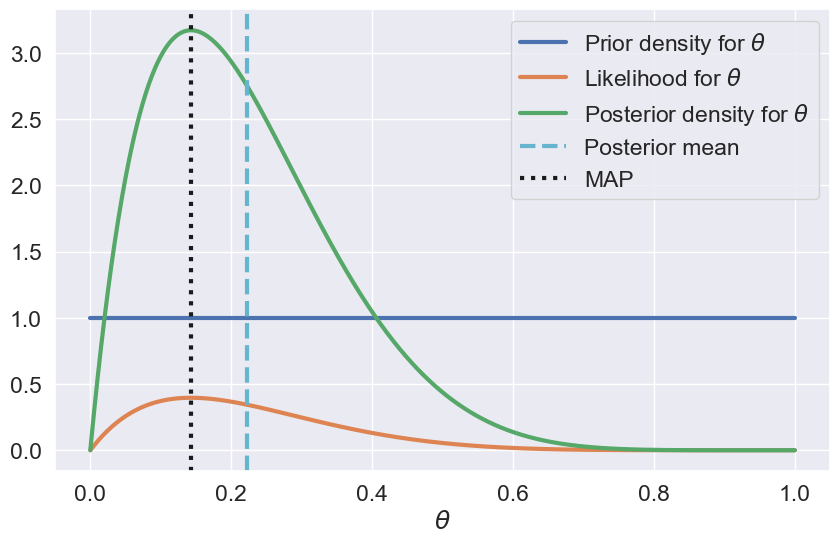

In [4]:
# data
N = 7
y = 1

# prior
alpha0 = 1
beta0 = 1

# posterior
alpha = alpha0 + y
beta = beta0 + N - y

# MAP
theta_MAP = (alpha - 1)/(alpha + beta - 2)
theta_post_mean = alpha/(alpha + beta)

# plot
thetas = np.linspace(0, 1, 1000)
fig, ax = plt.subplots(1,1, figsize=(10, 6))
ax.plot(thetas, beta_dist.pdf(thetas, alpha0, beta0), label='Prior density for $\\theta$')
ax.plot(thetas, binom_dist.pmf(y, n=N, p=thetas), label='Likelihood for $\\theta$')
ax.plot(thetas, beta_dist.pdf(thetas, alpha, beta), label='Posterior density for $\\theta$')
ax.axvline(theta_post_mean, color='c', linestyle='--', label='Posterior mean')
ax.axvline(theta_MAP, color='k', linestyle=':', label='MAP')
ax.set(xlabel='$\\theta$')
ax.legend();

**compute the posterior mean and confidence interval**

In [6]:
alpha0 = 2
beta0 = 17

N = 20
y = 4

def summarize_posterior(N, y, alpha0, beta0, interval_sizes=[95]):

    # compute posterior
    alpha = alpha0 + y
    beta =  beta0 + N - y

    # print data, prior, posterior
    print(f'Data:           {y} successes in {N} trials')
    print(f'Prior:          Beta({alpha0},{beta0})')
    print(f'Posterior:      Beta({alpha}, {beta})')

    # posterior mean
    posterior_mean = alpha/(alpha+beta)
    print(f'Posterior mean: {posterior_mean:3.2f}')

    # intervals
    for interval_size in interval_sizes:
        theta_lower, theta_upper = beta_dist.interval(interval_size/100, a=alpha, b=beta)
        print(f'{interval_size}%-credibility interval: [{theta_lower:3.4f}-{theta_upper:3.4f}]')
    print('')

summarize_posterior(N=20, y=4, alpha0=2, beta0=17, interval_sizes=[50, 90, 95])



Data:           4 successes in 20 trials
Prior:          Beta(2,17)
Posterior:      Beta(6, 33)
Posterior mean: 0.15
50%-credibility interval: [0.1123-0.1891]
90%-credibility interval: [0.0711-0.2570]
95%-credibility interval: [0.0602-0.2809]



**Computing PDF,CDF and PPF**

In [8]:
from scipy.stats import norm

# Define the mean and standard deviation
mu = 0  # Mean
sigma = 5  # Standard deviation

# Compute the PDF at a specific point(probability density function)
x = 1.5
pdf_value = norm.pdf(x, mu, sigma)
print(f"PDF at x = {x}: {pdf_value}")

# Compute the CDF at a specific point(cumulative density function)
cdf_value = norm.cdf(x, mu, sigma)
print(f"CDF at x = {x}: {cdf_value}")

# Compute the PPF (quantile) for a given probability(Percent Point Function)
p = 0.95
quantile = norm.ppf(p, mu, sigma)
print(f"95th percentile (quantile for p = 0.95): {quantile}")

# Generate random samples from the distribution
num_samples = 5
samples = norm.rvs(mu, sigma, size=num_samples)
print(f"Random samples: {samples}")


PDF at x = 1.5: 0.07627756309210483
CDF at x = 1.5: 0.6179114221889526
95th percentile (quantile for p = 0.95): 8.224268134757361
Random samples: [ 1.78278923 -2.96826607  2.76544547  7.93698939 -1.62735788]


In [9]:
0.076277
0.079390

print(1/(1+(0.5*0.076277)/(0.5*0.079390)))

0.5099989079252507


**Function to evaluate log prior, likelihood and the joint distribution**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import invgamma, norm

/var/folders/ff/tm9v3zh91jv9vg9vgbf1rhnr0000gn/T/ipykernel_32345/1922076767.py:33: RuntimeWarning: invalid value encountered in sqrt
  likelihood += norm.logpdf(yi, a, np.sqrt(b))


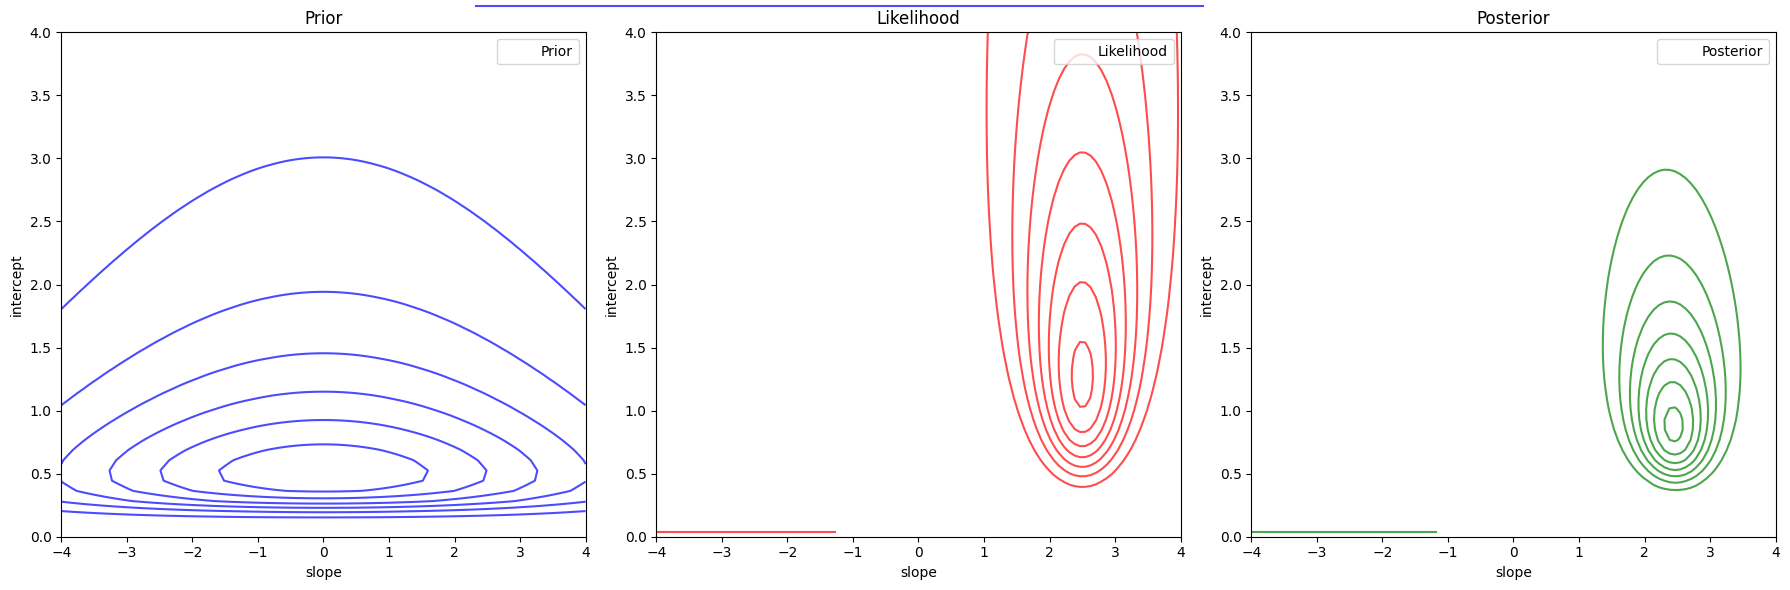

In [4]:
# Define the plot_distribution function as requested
def plot_distribution(ax, density_fun, color=None, visibility=1, label=None, title=None, num_points=100):
    # create grid for parameters (a,b)
    a_array = np.linspace(-4, 4, num_points)
    b_array = np.linspace(-4, 4, num_points)  
    A_array, B_array = np.meshgrid(a_array, b_array)   
    
    # form array with all combinations of (a,b) in our grid
    AB = np.column_stack((A_array.ravel(), B_array.ravel()))
    
    # evaluate density for every point in the grid and reshape back
    Z = density_fun(AB[:, 0], AB[:, 1])
    Z = Z.reshape((num_points, num_points))
    
    # plot contour  
    cs = ax.contour(a_array, b_array, np.exp(Z), colors=color, alpha=visibility)
    if label:
        cs.collections[0].set_label(label)
    ax.set(xlabel='slope', ylabel='intercept', xlim=(-4, 4), ylim=(0, 4), title=title)
    if label:
        ax.legend()

# Observations
y = np.array([1, 2, 3, 4])

# Define the density functions for prior, likelihood, and posterior
def prior_density(a, b):
    return norm.logpdf(a, 0, np.sqrt(10)) + invgamma.logpdf(b, 1, scale=1)

def likelihood_density(a, b):
    likelihood = np.zeros_like(a)
    for yi in y:
        likelihood += norm.logpdf(yi, a, np.sqrt(b))
    return likelihood

def posterior_density(a, b):
    return likelihood_density(a, b) + prior_density(a, b)

# Create the figure and axes
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot distributions
plot_distribution(axs[0], prior_density, color='blue', visibility=0.7, label='Prior', title='Prior')
plot_distribution(axs[1], likelihood_density, color='red', visibility=0.7, label='Likelihood', title='Likelihood')
plot_distribution(axs[2], posterior_density, color='green', visibility=0.7, label='Posterior', title='Posterior')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


**Use a grid approximation to compute and plot posterior distributions**

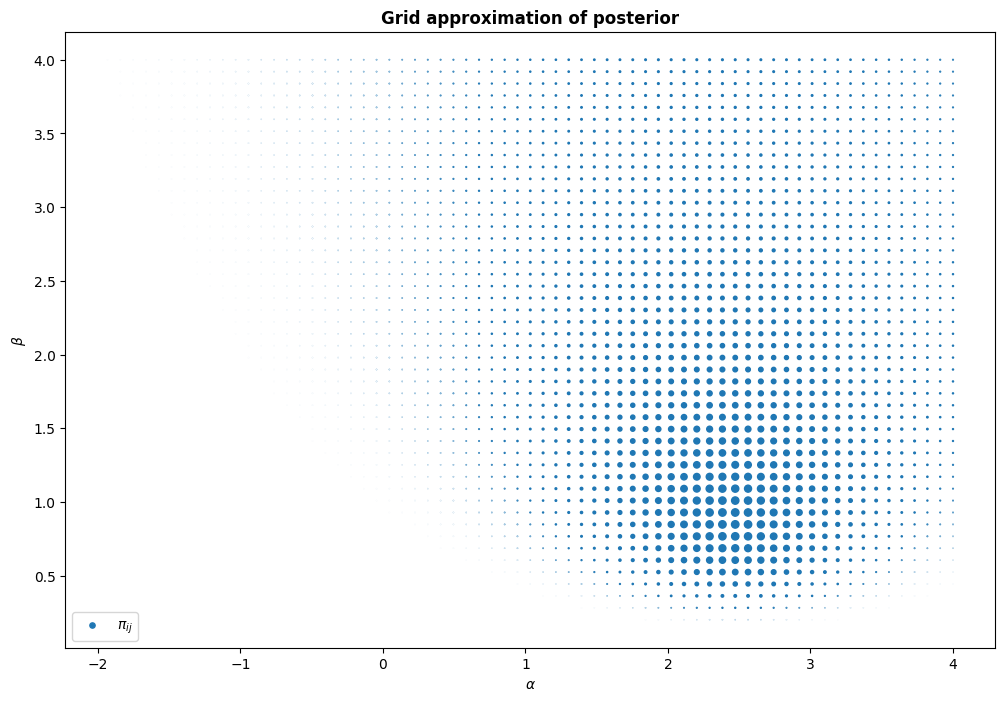

In [22]:
class Grid2D(object):
    """ helper class for evaluating the function func on the grid defined by (alpha, beta)"""

    def __init__(self, alphas, betas, func, name="Grid2D"):
        self.alphas = alphas
        self.betas = betas
        self.grid_size = (len(self.alphas), len(self.betas))
        self.alpha_grid, self.beta_grid = np.meshgrid(alphas, betas, indexing='ij')
        self.func = func
        self.name = name
        
        # evaluate function on each grid point
        self.values = self.func(self.alpha_grid[:, :, None], self.beta_grid[:, :, None]).squeeze()

    def plot_contours(self, ax, color='b', num_contours=10, f=lambda x: x, alpha=1.0, title=None):
        ax.contour(self.alphas, self.betas, f(self.values).T, num_contours, colors=color, alpha=alpha)
        ax.set(xlabel='$\\alpha$', ylabel='$\\beta$')
        ax.set_title(self.name, fontweight='bold')

    @property
    def argmax(self):
        idx = np.argmax(self.values)
        alpha_idx, beta_idx = np.unravel_index(idx, self.grid_size)
        return self.alphas[alpha_idx], self.betas[beta_idx]

class GridApproximation2D(Grid2D):

    def __init__(self, alphas, betas, log_joint, threshold=1e-8, name="GridApproximation2D"):
        Grid2D.__init__(self, alphas, betas, log_joint, name)
        self.threshold = threshold
        self.prep_approximation()
        self.compute_marginals()
        self.sanity_check()
        
    def prep_approximation(self):
        
        # [num_alpha, num_beta]-sized matrix of the log joint evaluated on the grid 
        self.log_joint_grid = self.values
        self.log_joint_grid = self.log_joint_grid - np.max(self.log_joint_grid)

        # convert from log densities to probabilities density for each point on the grid 
        self.tilde_probabilities_grid = np.exp(self.log_joint_grid) 

        # compute normalization constant 
        self.Z = np.sum(self.tilde_probabilities_grid)      

        # [num_alpha, num_beta]-matrix of \pi_{ij}-values summing to 1.
        self.probabilities_grid = self.tilde_probabilities_grid/self.Z    

        # flatten for later convinience
        self.alphas_flat = self.alpha_grid.flatten()                                             # shape: [num_alpha*num_beta] = [num_outcomes]
        self.betas_flat = self.beta_grid.flatten()                                               # shape: [num_alpha*num_beta] = [num_outcomes]
        self.num_outcomes = len(self.alphas_flat)                                                # shape: scalar 
        self.probabilities_flat = self.probabilities_grid.flatten()                              # [num_outcomes]
    def compute_marginals(self):
        self.pi_alpha = self.probabilities_grid.sum(1)  
        self.pi_beta = self.probabilities_grid.sum(0)  

        # compute marginal distribution using sum rule
    def compute_expectation(self, f):
        """ computes expectation of f(alpha, beta) wrt. the grid approximation """
        return np.sum(f(self.alphas_flat, self.betas_flat)*self.probabilities_flat, axis=0)
    
    def sample(self, num_samples=1):
        """ generate num_samples from the grid approximation distribution """
        idx = np.random.choice(np.arange(self.num_outcomes), p=self.probabilities_flat, size=num_samples)
        return self.alphas_flat[idx], self.betas_flat[idx]

    def visualize(self, ax, scaling=8000, title='Grid approximation'):
        idx = self.probabilities_flat > self.threshold
        ax.scatter(self.alphas_flat[idx], self.betas_flat[idx], scaling*self.probabilities_flat[idx],label='$\pi_{ij}$')        
        ax.set(xlabel='$\\alpha$', ylabel='$\\beta$')
        ax.set_title(title, fontweight='bold')

    def sanity_check(self):
        assert self.probabilities_grid.shape == self.grid_size, "Probability grid does not have shape [num_alphas, num_betas] (self.grid_size). Check your implementation."
        assert np.all(self.probabilities_grid >= 0), "Not all values in probability grid are non-negative. Check your implementation."
        assert np.allclose(self.probabilities_grid.sum(), 1), "Values in probability grid do not sum to one. Check your implementation."

# grid
num_alpha, num_beta = 90, 100
alphas = np.linspace(-4, 4, num_alpha)
betas = np.linspace(-4, 4, num_beta)

# Observations
y = np.array([1, 2, 3, 4])

# Define the density functions for prior, likelihood, and posterior
def prior_density(a, b):
    return norm.logpdf(a, 0, np.sqrt(10)) + invgamma.logpdf(b, 1, scale=1)

def likelihood_density(a, b):
    likelihood = np.zeros_like(a)
    b_positive = np.clip(b, 1e-6, None)
    for yi in y:
        likelihood += norm.logpdf(yi, a, np.sqrt(b_positive))
    return likelihood

def posterior_density(a, b):
    return likelihood_density(a, b) + prior_density(a, b) # this is the log joint

# Create the grid approximation
log_joint = lambda a, b: posterior_density(a, b)
grid_approximation = GridApproximation2D(alphas, betas, log_joint)

# plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
grid_approximation.visualize(ax, scaling=8000,title='Grid approximation of posterior')
ax.set(xlabel='$\\alpha$', ylabel='$\\beta$')
ax.legend();


**plot the marginal posterior distribution $p(\mu|y)$ and $p(\sigma^2|y)$**

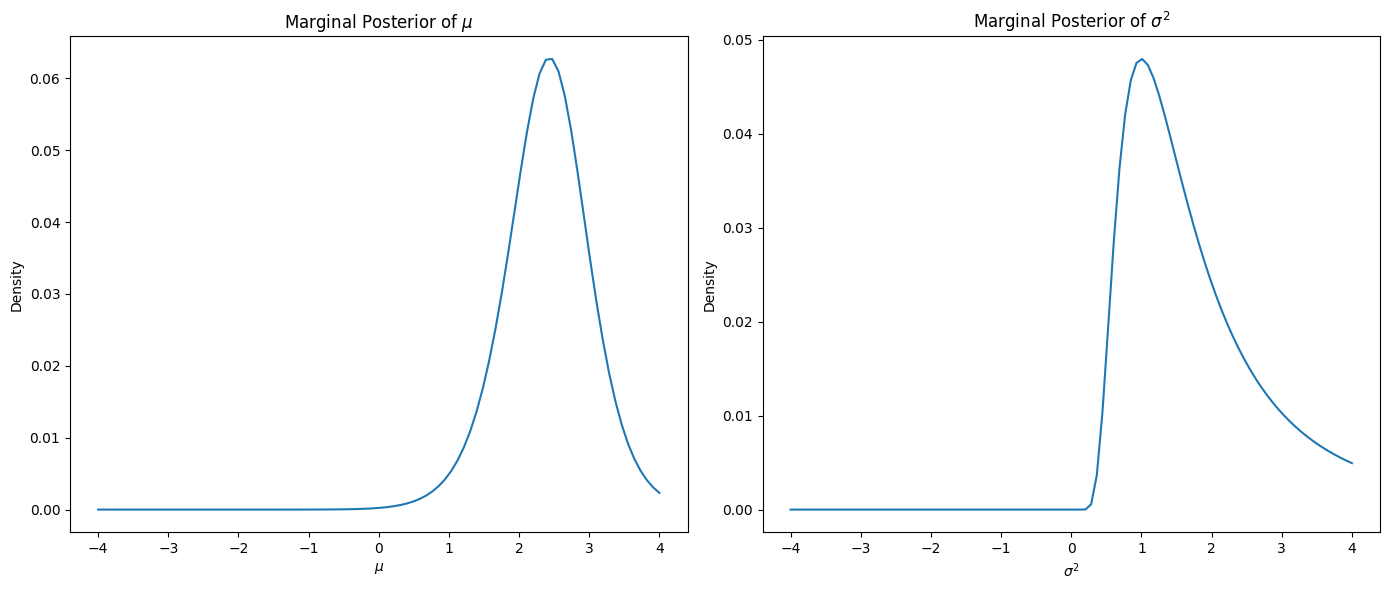

In [23]:
# Plot the marginal posterior distributions
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Marginal posterior of mu (alpha)
axs[0].plot(grid_approximation.alphas, grid_approximation.pi_alpha)
axs[0].set_title('Marginal Posterior of $\\mu$')
axs[0].set_xlabel('$\\mu$')
axs[0].set_ylabel('Density')

# Marginal posterior of sigma^2 (beta)
axs[1].plot(grid_approximation.betas, grid_approximation.pi_beta)
axs[1].set_title('Marginal Posterior of $\\sigma^2$')
axs[1].set_xlabel('$\\sigma^2$')
axs[1].set_ylabel('Density')

plt.tight_layout()
plt.show()


**compute posterior mean and $95 \%$ credibility interval for $\mu$ and $\sigma^2$**

In [25]:

class DiscreteDistribution1D(object):

    def __init__(self, outcomes, probabilities, name='DiscreteDistribution'):
        """ represents discrete random variable X in terms of outcomes and probabilities """
        self.outcomes = outcomes
        self.probabilities = probabilities
        assert self.outcomes.shape == self.probabilities.shape
        self.name = name

    def CDF(self, x):
        """ P[X <= x] """
        idx = self.outcomes <= x
        return np.sum(self.probabilities[idx]) 
    
    def quantile(self, p):
        """ Q(p) = inf {x | p < CDF(x)} """
        cdf_values = np.cumsum(self.probabilities) 
        idx = np.where(np.logical_or(p < cdf_values, np.isclose(p, cdf_values)))[0]
        return np.min(self.outcomes[idx])
    
    @property
    def mean(self):
        """ return scalar corresponding to the mean of the discrete distribution """
        return np.sum(self.outcomes * self.probabilities)  
    
    @property
    def variance(self):
        """ return scalar corresponding to the variance of the discrete distribution """
        return np.sum((self.outcomes - self.mean)**2 * self.probabilities)  
    
    def central_interval(self, interval_size=95):
        """ return tuple (lower, upper) corresponding to the central interval of the discrete distribution """
        c = 1.-interval_size/100.
        return self.quantile(c/2), self.quantile(1-c/2)  
    
    def print_summary(self):
        print(f'Summary for {self.name}')
        print(f'\tMean:\t\t\t\t{self.mean:3.2f}')
        print(f'\tStd. dev.:\t\t\t{np.sqrt(self.variance):3.2f}')
        print(f'\t95%-credibility interval:\t[{self.central_interval()[0]:3.2f}, {self.central_interval()[1]:3.2f}]\n')


# example use and sanity sanity checks using classic six-sided die
outcomes, probs = np.arange(1,6+1), np.ones(6)/6
sixsided_die = DiscreteDistribution1D(outcomes, probs)
assert np.allclose(sixsided_die.mean, 3.5), f"The mean of a sixsided die should be 3.5, but the value was {sixsided_die.mean:3.2f}. Check your implementation."
assert np.allclose(sixsided_die.variance, 35/12), f"The variance of a sixsided die should be approximately 2.92, but the value was {sixsided_die.variance:3.2f}. Check your implementation."
assert np.allclose(sixsided_die.central_interval(95), (1, 6)), f"The (approximate) 95% central interval of a sixsided die should be (1,6), but the value was {sixsided_die.central_interval(95)}. Check your implementation."

# summarize posterior marginals for alpha and beta
post_alpha_marginal = DiscreteDistribution1D(grid_approximation.alphas, grid_approximation.pi_alpha, "posterior distribution of $\mu$")
post_beta_marginal = DiscreteDistribution1D(grid_approximation.betas, grid_approximation.pi_beta, "posterior distribution of $\sigma^2$")

post_alpha_marginal.print_summary()
post_beta_marginal.print_summary()


Summary for posterior distribution of $\mu$
	Mean:				2.39
	Std. dev.:			0.61
	95%-credibility interval:	[1.12, 3.55]

Summary for posterior distribution of $\sigma^2$
	Mean:				1.65
	Std. dev.:			0.84
	95%-credibility interval:	[0.53, 3.68]



**Compute and plot the posterior predictive density for a new observation y∗ using**
1.the plugin approximation with MLE, 
2.the plugin approximation using MAP, and 
3.the grid approximation

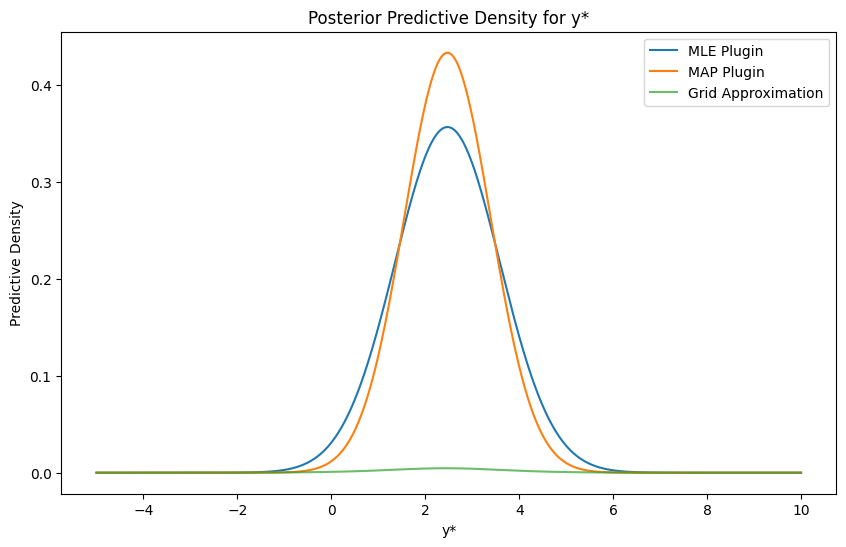

In [29]:
# identify MAP estimates
mu_MAP, sigma2_MAP = grid_approximation.argmax

# identify MLE estimates
log_likehood_grid = Grid2D(alphas, betas, likelihood_density, "log likelihood")
mu_MLE, sigma2_MLE = log_likehood_grid.argmax

# compute the posterior predictive distribution
def predictive_density(y_star, mu, sigma2):
    sigma2 = np.clip(sigma2, 1e-6, None)
    return norm.pdf(y_star, mu, np.sqrt(sigma2))

# grid for the predictive distribution
y_star = np.linspace(-5, 10, 1000)
posterior_predictive_grid = np.zeros_like(y_star)

for i, mu in enumerate(grid_approximation.alphas):
    for j, sigma2 in enumerate(grid_approximation.betas):
        posterior_predictive_grid += predictive_density(y_star, mu, sigma2) * grid_approximation.probabilities_grid[i, j]

# normalize
posterior_predictive_grid = posterior_predictive_grid/np.sum(posterior_predictive_grid)

# plot
plt.figure(figsize=(10, 6))
plt.plot(y_star, predictive_density(y_star, mu_MLE, sigma2_MLE), label='MLE Plugin')
plt.plot(y_star, predictive_density(y_star, mu_MAP, sigma2_MAP), label='MAP Plugin')
plt.plot(y_star, posterior_predictive_grid, label='Grid Approximation', alpha=0.7)
plt.xlabel('y*')
plt.ylabel('Predictive Density')
plt.title('Posterior Predictive Density for y*')
plt.legend()
plt.show()
